### Interpretation of features

Specify path to an experiment in a format `outputs/YYYY-MM-DD/HH-MM-SS`.

In [1]:
EXPERIMENT_PATH = "outputs/2023-06-21/13-12-11"

In [2]:
import os
import json
from matplotlib import pyplot as plt


PATH_PREFIX = "/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept"
path_json = os.path.join(PATH_PREFIX, EXPERIMENT_PATH, "results.json")

def load_results(path):
    with open(path) as f:
        results = json.load(f)
    return int(results["top_k"]), results["results"]

n_images, results = load_results(path_json)

In [5]:
results[2]

{'concept': [['curved', 0.7636106014251709],
  ['allpurpose', 0.25228980843379595],
  ['head', 0.21047914767201417],
  ['seabird', 0.20684667145028526],
  ['masked', 0.05309501026308031],
  ['crested', 0.00885471162031205],
  ['rounded', 0.007866755952090174],
  ['<pad>', 0.003124999813735485],
  ['yellow', 0.002981372814721975],
  ['solid', 0.00048429845478095473],
  ['very', 0.0004116586088519363],
  ['uprightperching', 1.432380549674637e-06],
  ['pointedwings', 3.799182133213298e-07],
  ['long', 7.819216777936036e-08],
  ['death', 0.0],
  ['siloette', 0.0],
  ['butterfly', 0.0],
  ['due', 0.0],
  ['barricade', 0.0],
  ['curly', 0.0],
  ['yello', 0.0],
  ['daffodil', 0.0],
  ['conclusion', 0.0],
  ['companion', 0.0],
  ['fro', 0.0],
  ['corgy', 0.0],
  ['brighton', 0.0],
  ['av', 0.0],
  ['october', 0.0],
  ['veldt', 0.0],
  ['eatin', 0.0],
  ['newestappliances', 0.0],
  ['hub', 0.0],
  ['gauge', 0.0],
  ['dial', 0.0],
  ['mechine', 0.0],
  ['mismatched', 0.0],
  ['participating', 0.

In [6]:
def plot_instances(features, n_images):
    fig, axes = plt.subplots(3, n_images)
    fig.set_size_inches(10, 4)
    labels = ["lrg", "mdm", "sml"]
    for i, ax in enumerate(axes.flatten()):
        label = labels[i // n_images]
        image = plt.imread(features[label][i % n_images][0])
        label = float(features[label][i % n_images][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()


def visualize_concept(results, n_images, concept_id=0, n_tokens=10):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a in pair["concept"]][:n_tokens]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    if pair["feature"]:
        print("\nTop-n images with largest absolute values of logits:")
        plot_instances(pair["feature"], n_images)
    print(120 * "-")

The following cell plots images with extreme values of feature logits (largest, closest to zero, smallest) and correspondent textual explanations sorted according attention score.

Concept #1

Top-k tokens w.r.t. average attention score:
	1. <d0>: 0.6844
	2. lime: 0.2599
	3. olive: 0.2572
	4. green: 0.2484
	5. emerald: 0.2082
	6. red: 0.1641
	7. shape: 0.1428
	8. cherry: 0.1304
	9. scarlet: 0.1289
	10. position: 0.0949

Top-n images with largest absolute values of logits:


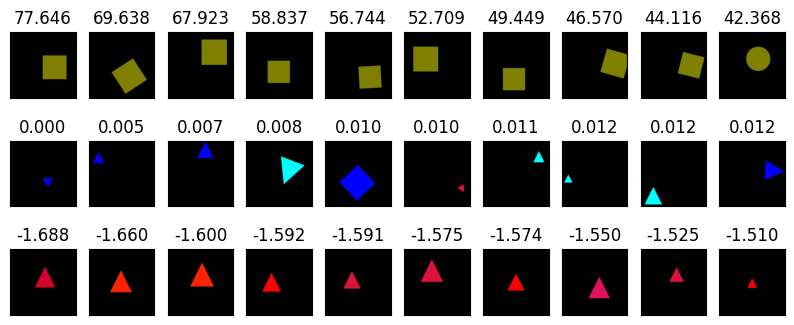

------------------------------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. <d1>: 0.7609
	2. azure: 0.6368
	3. ruby: 0.5766
	4. crimson: 0.5554
	5. canvas: 0.1884
	6. no: 0.0514
	7. triangular: 0.0410
	8. circular: 0.0381
	9. static: 0.0288
	10. lapis: 0.0137

Top-n images with largest absolute values of logits:


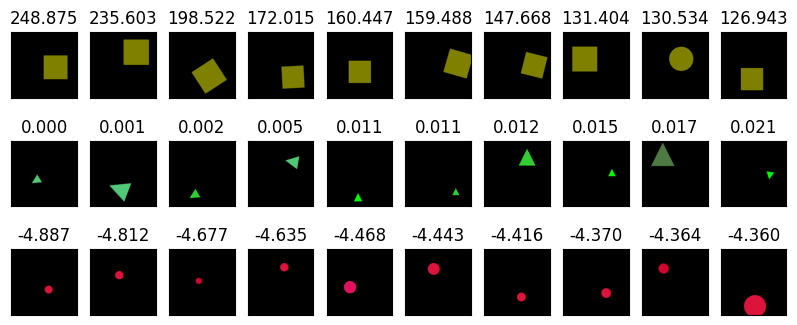

------------------------------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. <d2>: 0.7673
	2. circular: 0.6132
	3. no: 0.4790
	4. azure: 0.2192
	5. ruby: 0.1704
	6. crimson: 0.1537
	7. triangular: 0.1098
	8. fern: 0.0905
	9. canvas: 0.0867
	10. lime: 0.0206

Top-n images with largest absolute values of logits:


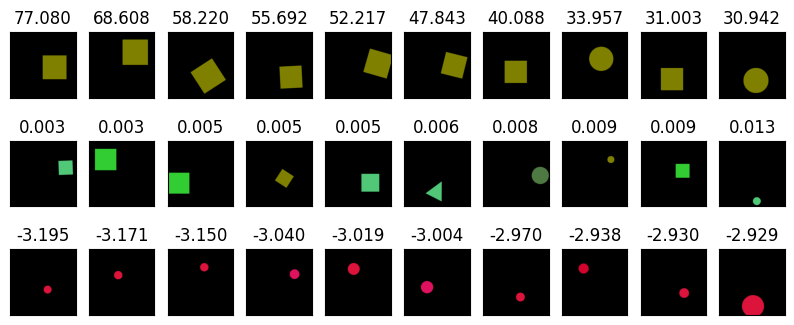

------------------------------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. static: 0.2254
	2. <d3>: 0.2066
	3. unrotate: 0.1967
	4. color: 0.1831
	5. lapis: 0.1565
	6. canvas: 0.1496
	7. up: 0.1411
	8. photo: 0.1295
	9. right: 0.1290
	10. form: 0.1209

Top-n images with largest absolute values of logits:


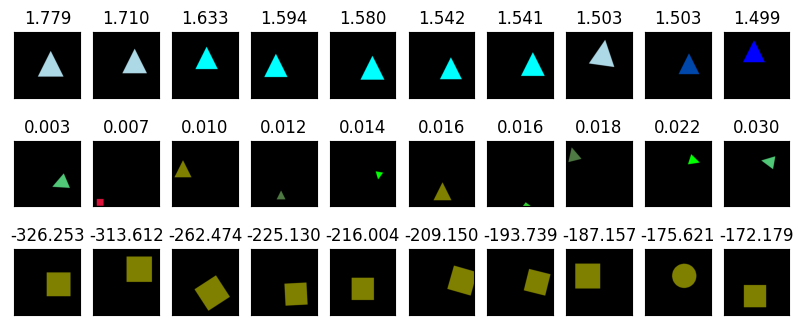

------------------------------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. <d4>: 0.5964
	2. three: 0.5260
	3. triangular: 0.4437
	4. scarlet: 0.3956
	5. fern: 0.3391
	6. round: 0.3096
	7. cherry: 0.2970
	8. circular: 0.2960
	9. red: 0.2939
	10. emerald: 0.2210

Top-n images with largest absolute values of logits:


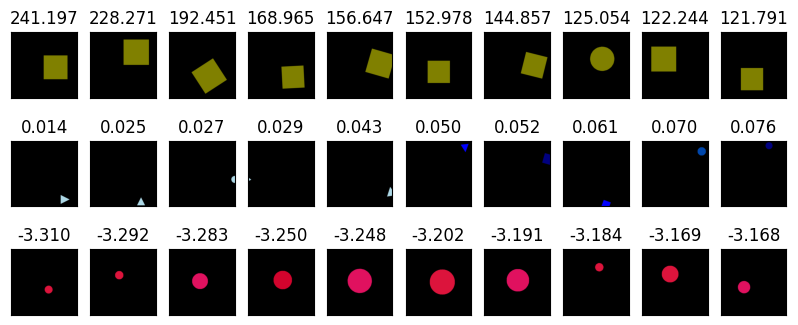

------------------------------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. shape: 0.2960
	2. navy: 0.2666
	3. it: 0.2169
	4. locate: 0.2108
	5. turn: 0.1989
	6. position: 0.1971
	7. four: 0.1965
	8. <d5>: 0.1880
	9. transparent: 0.1858
	10. unturn: 0.1826

Top-n images with largest absolute values of logits:


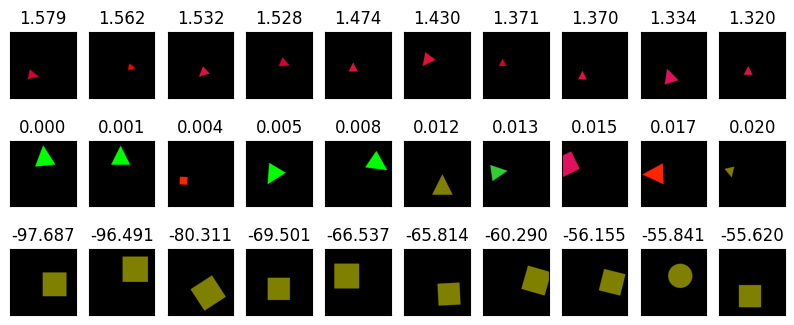

------------------------------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. <d6>: 0.3809
	2. olive: 0.2570
	3. blue: 0.2519
	4. corner: 0.2500
	5. bottom: 0.1987
	6. no: 0.1746
	7. green: 0.1488
	8. position: 0.1348
	9. lime: 0.1012
	10. angle: 0.1007

Top-n images with largest absolute values of logits:


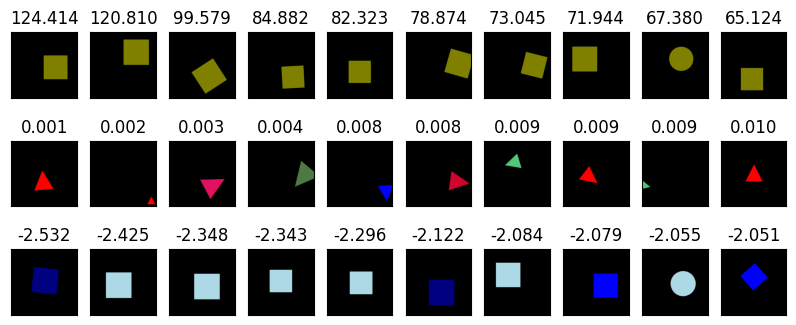

------------------------------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. background: 0.1887
	2. left: 0.1863
	3. image: 0.1859
	4. rotate: 0.1729
	5. blank: 0.1723
	6. shade: 0.1715
	7. photo: 0.1559
	8. up: 0.1521
	9. cyan: 0.1364
	10. picture: 0.1306

Top-n images with largest absolute values of logits:


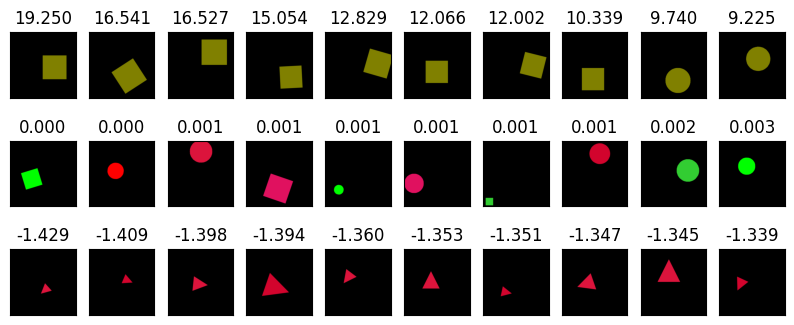

------------------------------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. <d8>: 0.6441
	2. red: 0.4351
	3. fern: 0.3214
	4. olive: 0.3003
	5. emerald: 0.2940
	6. scarlet: 0.2933
	7. cherry: 0.2853
	8. lime: 0.2649
	9. triangular: 0.2479
	10. crimson: 0.2349

Top-n images with largest absolute values of logits:


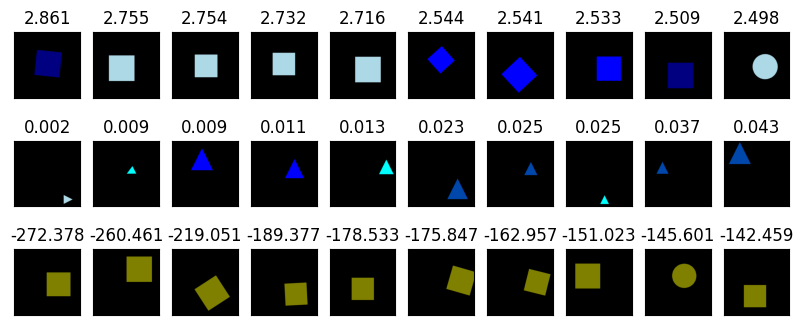

------------------------------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. <d9>: 0.7406
	2. cherry: 0.3785
	3. scarlet: 0.3528
	4. three: 0.3066
	5. triangular: 0.2860
	6. emerald: 0.2730
	7. lime: 0.2702
	8. olive: 0.2675
	9. round: 0.1863
	10. red: 0.1842

Top-n images with largest absolute values of logits:


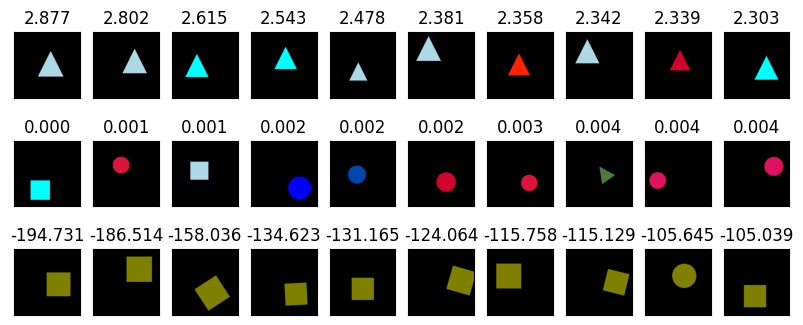

------------------------------------------------------------------------------------------------------------------------


In [7]:
for concept_id in range(10):
    visualize_concept(results, n_images, concept_id, n_tokens=10)